In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [25]:
#test6_gap size sweep from 2 um to 50 um.txt

fd = open('test6_gap size sweep from 2 um to 50 um.txt','r')   

d = np.loadtxt(fd,
           comments='%',delimiter=None)
fd.close()
# print(d[532:536])
#print(x_array)

arg=(np.arange(2,7,1), np.arange(7.5,16,2.5), np.arange(20,51,5)) #make the gap size array
gap=np.concatenate(arg)
#print(gap)

steps=41 #frequency scan steps
#print(len(gap), len(d))

# Data=([])
# Data[0]=d[532:536]


# Data[0]=d[0:40]


    
dataset=np.split(d,len(gap),axis=0) #data sets of different gap size
#print(dataset[2])


test=dataset[len(dataset)-3] #one set of data
x_array=test[:,0]
y_array=test[:,1]

#print(x_array[3])

#initial guess for the fitting
amp1 = 1 #estimated vibration amplitude in nm
cen1 = 2000 #Hz
wid1 = 200
offset1=0.2 #nm


#print(test)



[[1.60000000e+03 2.59597856e-02]
 [1.62000000e+03 2.77969301e-02]
 [1.64000000e+03 2.99290378e-02]
 [1.66000000e+03 3.24327961e-02]
 [1.68000000e+03 3.54135866e-02]
 [1.70000000e+03 3.90206395e-02]
 [1.72000000e+03 4.34717834e-02]
 [1.74000000e+03 4.90988766e-02]
 [1.76000000e+03 5.64299759e-02]
 [1.78000000e+03 6.63583672e-02]
 [1.80000000e+03 8.05160141e-02]
 [1.82000000e+03 1.02174943e-01]
 [1.84000000e+03 1.38731210e-01]
 [1.86000000e+03 2.08425167e-01]
 [1.88000000e+03 3.29237919e-01]
 [1.90000000e+03 3.04046579e-01]
 [1.92000000e+03 1.88864893e-01]
 [1.94000000e+03 1.27924941e-01]
 [1.96000000e+03 9.52343367e-02]
 [1.98000000e+03 7.54410449e-02]
 [2.00000000e+03 6.22986662e-02]
 [2.02000000e+03 5.29764174e-02]
 [2.04000000e+03 4.60353587e-02]
 [2.06000000e+03 4.06725721e-02]
 [2.08000000e+03 3.64084830e-02]
 [2.10000000e+03 3.29387665e-02]
 [2.12000000e+03 3.00614716e-02]
 [2.14000000e+03 2.76376720e-02]
 [2.16000000e+03 2.55685102e-02]
 [2.18000000e+03 2.37820124e-02]
 [2.200000

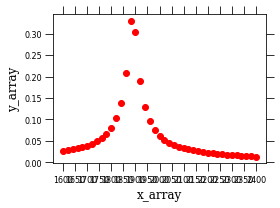

In [24]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro")

#ax1.set_xlim(-5,105)
#ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)


fig.tight_layout()
fig.savefig("raw_resonance.png", format="png",dpi=1000)

In [26]:
#reference paper: acoustic quality factor and energy losses in cylinderical pipes.pdf

def resonance(f, C, f0, r):
    return C/np.sqrt((f**2-f0**2)**2+(r*f)**2)

f0=1900 #central frequency in Hz
r=200*np.pi #estimated resonance width 
C=2e6*np.pi # amplitude factor, which is decided by F/m


In [27]:
#curve fitting

popt, pcov = scipy.optimize.curve_fit(resonance, x_array, y_array, p0=[C,f0,r],bounds=(0, +np.inf))

perr = np.sqrt(np.diag(pcov))

residual = y_array - (resonance(x_array, *popt))

#print(popt)
pars_1 = popt[0]
pars_2 = popt[1] #peak frequency
pars_3 = popt[2]

Q=pars_2/pars_3 # Q factor
Amp=pars_1/(pars_3*pars_2)# peak vibration amplitude
freq=pars_2
print(Q,Amp,freq)
#print(Amp)
# print ("-------------Peak-------------")
# print ('C = %0.2f (+/-) %0.2f'%(pars_1, perr[0]))
# print ("f0 = %0.2f (+/-) %0.2f" % (pars_2, perr[1]))
# print ("r = %0.2f (+/-) %0.2f" % (pars_3, perr[2]))
# print("Q factor is %0.2f" %(Q))

46.38009829562273 0.35342529958710256 1888.3158264888461


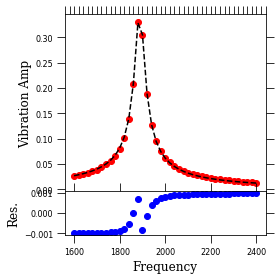

In [28]:
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.25])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
gs.update(hspace=0) 

ax1.plot(x_array, y_array, "ro")
ax1.plot(x_array, resonance(x_array, *popt), 'k--')#,\


# residual
ax2.plot(x_array, residual, "bo")
    
#ax1.set_xlim(-5,105)
#ax1.set_ylim(-0.5,8)

#ax2.set_xlim(-5,105)
#ax2.set_ylim(-0.5,0.75)

ax2.set_xlabel("Frequency",family="serif",  fontsize=12)
ax1.set_ylabel("Vibration Amp",family="serif",  fontsize=12)
ax2.set_ylabel("Res.",family="serif",  fontsize=12)

# ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

# ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.tick_params(axis='x',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
#ax1.tick_params(axis='x',which='minor', direction="out", top="on", right="on", bottom="off", length=5, labelsize=8)
ax1.tick_params(axis='y',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
#ax1.tick_params(axis='y',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

ax2.tick_params(axis='x',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
#ax2.tick_params(axis='x',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)
ax2.tick_params(axis='y',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
#ax2.tick_params(axis='y',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit_peaks_resid.png", format="png",dpi=1000)